## Мехмандаров М.Ф. ИУ5-63Б, В-12

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

In [1]:
import pandas as pd
import numpy as np

### Датасет

In [5]:
data = pd.read_csv('../data/states_all.csv')
data.shape

(1918, 25)

In [4]:
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           694
TOTAL_REVENUE                    643
FEDERAL_REVENUE                  643
STATE_REVENUE                    643
LOCAL_REVENUE                    643
TOTAL_EXPENDITURE                643
INSTRUCTION_EXPENDITURE          643
SUPPORT_SERVICES_EXPENDITURE     643
OTHER_EXPENDITURE                694
CAPITAL_OUTLAY_EXPENDITURE       643
GRADES_PK_G                      376
GRADES_KG_G                      286
GRADES_4_G                       286
GRADES_8_G                       286
GRADES_12_G                      286
GRADES_1_8_G                     898
GRADES_9_12_G                    847
GRADES_ALL_G                     286
AVG_MATH_4_SCORE                1383
AVG_MATH_8_SCORE                1387
AVG_READING_4_SCORE             1386
AVG_READING_8_SCORE             1421
dtype: int64

In [6]:
data.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


### Пустые значения LOCAL_REVENUE заменим минимальным int

In [20]:
import sys
min = -sys.maxsize - 1

data['LOCAL_REVENUE'].fillna(min, inplace=True)
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1.659028e+06,7.156800e+05,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,7.207110e+05,2.221000e+05,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1.369815e+06,1.590376e+06,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,9.587850e+05,5.746030e+05,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,1.654651e+07,7.641041e+06,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,NaN,NaN,NaN,4.223743e+06,-9.223372e+18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,NaN,NaN,4.223743e+06,-9.223372e+18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,NaN,NaN,4.223743e+06,-9.223372e+18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,NaN,NaN,4.223743e+06,-9.223372e+18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


### Пустые значения TOTAL_REVENUE заменим максимальным значением int

In [21]:
import sys
max = sys.maxsize

data['TOTAL_REVENUE'].fillna(max, inplace=True)
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2.678885e+06,304177.0,1.659028e+06,7.156800e+05,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1.049591e+06,106780.0,7.207110e+05,2.221000e+05,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3.258079e+06,297888.0,1.369815e+06,1.590376e+06,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1.711959e+06,178571.0,9.587850e+05,5.746030e+05,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,2.626002e+07,2072470.0,1.654651e+07,7.641041e+06,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,NaN,9.223372e+18,NaN,4.223743e+06,-9.223372e+18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,9.223372e+18,NaN,4.223743e+06,-9.223372e+18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,9.223372e+18,NaN,4.223743e+06,-9.223372e+18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,9.223372e+18,NaN,4.223743e+06,-9.223372e+18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


### В поле 'STATE_REVENUE' пустые значения заменим на среднее

In [8]:
mean = data['STATE_REVENUE'].mean()
data['STATE_REVENUE'].fillna(mean, inplace=True)
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1.659028e+06,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,7.207110e+05,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1.369815e+06,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,9.587850e+05,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,1.654651e+07,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


### Заменим 'STATE' на самые редко встречающиеся

В моем датасете нет категориальных пустых значений. Но если бы были, то можно было использовать замену на редко встречающиеся

In [13]:
states = data['STATE'].value_counts()
states

NEW JERSEY              32
NORTH DAKOTA            32
ALABAMA                 32
RHODE ISLAND            32
GEORGIA                 32
                        ..
WEST_VIRGINIA           26
RHODE_ISLAND            26
DISTRICT_OF_COLUMBIA    26
NEW_JERSEY              26
NEW_YORK                26
Name: STATE, Length: 62, dtype: int64

Выберем NEW_YORK

In [15]:
data['STATE_REVENUE'].fillna('NEW_YORK', inplace=True)
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1.659028e+06,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,7.207110e+05,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1.369815e+06,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,9.587850e+05,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,1.654651e+07,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1.659028e+06,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,7.207110e+05,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1.369815e+06,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,9.587850e+05,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,1.654651e+07,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,NaN,NaN,4.223743e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


### Удалим строки с пустыми значениями.

In [30]:
data = data.dropna()
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
408,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,739992.0,217.941053,262.158206,206.880030,258.777258
410,2000_ARIZONA,ARIZONA,2000,814807.0,5479168.0,534619.0,2481089.0,2463460.0,5397194.0,2488932.0,...,72295.0,65526.0,49501.0,567626.0,236933.0,877696.0,218.766619,270.715406,205.347275,270.519439
411,2000_ARKANSAS,ARKANSAS,2000,450751.0,2844855.0,254735.0,2126099.0,464021.0,2683400.0,1531232.0,...,35724.0,34873.0,28918.0,281091.0,131511.0,449959.0,217.062870,261.363713,212.881797,268.004817
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,489043.0,441877.0,357789.0,3804640.0,1707952.0,6140814.0,213.565125,262.171027,205.916588,264.494066
414,2000_CONNECTICUT,CONNECTICUT,2000,530363.0,5884078.0,234321.0,2298931.0,3350826.0,5605280.0,3189123.0,...,44682.0,42597.0,32591.0,354391.0,155734.0,562179.0,234.243375,281.902486,229.381143,266.468618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2015_VERMONT,VERMONT,2015,85184.0,1996795.0,105333.0,1546600.0,344862.0,1969415.0,983532.0,...,5975.0,6173.0,6271.0,48722.0,26002.0,87866.0,243.250399,290.355191,230.098617,260.655136
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,246.612622,287.709299,228.971255,269.430665
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,244.981422,286.513108,225.892889,273.961831
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.310211,289.077749,223.356356,267.250881


### Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали?


Для количественных признаков:

- удалить пустые значения
- заменить минимальным значениями
- заменить максимальными значениями
- заменить средним значением

Для категориальных признаков:

- удалить пустые значения
- заменить значениями с самой маленькой частотой

# "Ящик с усами"

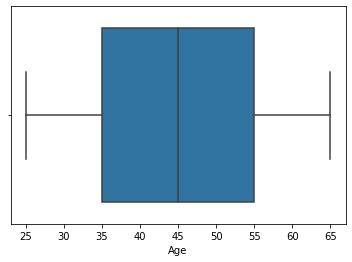

In [23]:
sns.boxplot(data['Year'])